## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
#!pip install --upgrade scikit-learn
!pip install mysql-connector-python
!pip install feature-engine
!pip install scikit-learn imbalanced-learn
#!pip install --upgrade imbalanced-learn scikit-learn
#!pip uninstall scikit-learn imbalanced-learn

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/92/56/73fb0cef5c38e9b777492a3a6f899ff0c3a253fb254445ad35bb636cfc0d/mysql_connector_python-8.1.0-cp39-cp39-win_amd64.whl.metadata
  Using cached protobuf-4.21.12-cp39-cp39-win_amd64.whl (527 kB)
Using cached mysql_connector_python-8.1.0-cp39-cp39-win_amd64.whl (10.8 MB)
  Obtaining dependency information for feature-engine from https://files.pythonhosted.org/packages/a3/1b/13e243aad6fcd559069b059c267db9ef8b843fc0afc443bf18cfcd9228e8/feature_engine-1.6.1-py2.py3-none-any.whl.metadata
  Using cached feature_engine-1.6.1-py2.py3-none-any.whl.metadata (8.7 kB)
  Obtaining dependency information for numpy>=1.18.2 from https://files.pythonhosted.org/packages/df/18/181fb40f03090c6fbd061bb8b1f4c32453f7c602b0dc7c08b307baca7cd7/numpy-1.25.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for pandas>=1.0.3 from https://files.pythonhosted.org/packages/9a/f2/0ad053856debbe90

In [4]:
!pip install feature-engine
!pip install seaborn
!pip install xgboost
!pip install catboost
!pip install catboost

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.1 from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a5/d6/80258c2759bd34abe267b5d3bc6300f7105aa70181b99d531283f7e7c79e/contourpy-1.1.0-cp39-cp39-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/cd/b1/8ba85c3d50562438d5991f5698d46b66dcadd43d230c7ba72edbd0c96ce8/fonttools-4.42.0-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/153.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/153.7 kB ? eta -:--:--
     ------- ----------------------------- 30.7/153.7 kB 435.7 kB/s eta 0:00:01
  

In [6]:
!pip install pandas
!pip install numpy


In [7]:
import pandas as pd                   # Data Manipulation
import numpy as np                    # Numeric Calculation
import seaborn as sns                 # Advance Data Visualization
import matplotlib.pyplot as plt       # Data Visualization
import scipy.stats as stats
import pylab
from sklearn.impute import SimpleImputer        #Imputation
from sklearn.compose import ColumnTransformer   #Column Trasformer
from sklearn.preprocessing import LabelEncoder  # Label Encoder
from sklearn.preprocessing import MinMaxScaler  # MinMax Scalar
import warnings   # Warnings
warnings.filterwarnings('ignore')
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import sklearn.metrics as skmet   # Confusion matrix
from imblearn.over_sampling import SMOTE
from feature_engine.outliers import Winsorizer    # Outlier treatment
#import mysql.connector as sql   # for SQL connection

In [8]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [108]:
df = pd.read_csv('Dataset\healthcare-dataset-stroke-data.csv')

#### Show Top 5 Records

In [78]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Drop unnecessary columns

In [79]:
df1 = df.drop(['id'], axis = 1)

#### Handling Duplicates

In [80]:
df1.duplicated().sum()
df2 = df1.drop_duplicates()
df2.duplicated().sum()

0

#### Check for missing/Null values

In [81]:
df2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Handle missing values

In [82]:
imputer = SimpleImputer(strategy='median')
numerical_cols = df2.select_dtypes(include=np.number).columns
categorical_cols = df2.select_dtypes(exclude=np.number).columns

df2[numerical_cols] = imputer.fit_transform(df2[numerical_cols])

for col in categorical_cols:
    df2[col].fillna(df2[col].mode()[0], inplace=True)

# Check for missing/Null values
df2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Apply Winsorization to numerical columns

In [83]:
winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=0.5)
df3 = winsorizer.fit_transform(df2)

#### Preparing X and Y variables

In [84]:
X = df3.drop(columns=['stroke'],axis=1)

In [85]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,54.531831,0.000000,0.167032,Yes,Private,Urban,128.787242,32.711440,formerly smoked
1,Female,54.531831,0.000000,0.000000,Yes,Self-employed,Rural,128.787242,28.100000,never smoked
2,Male,54.531831,0.000000,0.167032,Yes,Private,Rural,105.920000,32.500000,never smoked
3,Female,49.000000,0.000000,0.000000,Yes,Private,Urban,128.787242,32.711440,smokes
4,Female,54.531831,0.245745,0.000000,Yes,Self-employed,Rural,128.787242,25.012631,never smoked


In [86]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'ever_married' variable:     ",end=" " )
print(df['ever_married'].unique())

print("Categories in 'work_type' variable:  ",end=" ")
print(df['work_type'].unique())

print("Categories in 'Residence_type' variable:",end=" " )
print(df['Residence_type'].unique())

print("Categories in 'smoking_status' variable:     ",end=" " )
print(df['smoking_status'].unique())



Categories in 'gender' variable:      ['Male' 'Female' 'Other']
Categories in 'ever_married' variable:      ['Yes' 'No']
Categories in 'work_type' variable:   ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories in 'Residence_type' variable: ['Urban' 'Rural']
Categories in 'smoking_status' variable:      ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [87]:
y = df2['stroke']

In [88]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64

#### check y is Balanced or Imbalanced

In [89]:
# Target variable categories
# print(df3['Complications'].unique())
print(df2['stroke'].value_counts())

stroke
0.0    4861
1.0     249
Name: count, dtype: int64


In [90]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [91]:
X = preprocessor.fit_transform(X)

In [92]:
X.shape

(5110, 21)

#### Apply Smote to solve Imbalanced problem

In [93]:
smote = SMOTE()
# Perform SMOTE on the scaled numerical features
X_resampled, y_resampled = smote.fit_resample(X, y)

In [94]:
X_resampled.shape

(9722, 21)

In [95]:
y_resampled.shape

(9722,)

In [96]:
#print(y_resampled.value_counts())
y_resampled

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9717    1.0
9718    1.0
9719    1.0
9720    1.0
9721    1.0
Name: stroke, Length: 9722, dtype: float64

In [97]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7777, 21), (1945, 21))

#### Create an Evaluate Function to give all metrics after model Training

In [98]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [99]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3986
- Mean Absolute Error: 0.3268
- R2 Score: 0.3646
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4078
- Mean Absolute Error: 0.3353
- R2 Score: 0.3347


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3983
- Mean Absolute Error: 0.3274
- R2 Score: 0.3653
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4070
- Mean Absolute Error: 0.3353
- R2 Score: 0.3373


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2160
- Mean Absolute Error: 0.0904
- R2 Score: 0.8133
----------------------

### Results

In [100]:
result_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)
result_df

,Model Name,R2_Score
5,Random Forest Regressor,0.821985
6,XGBRegressor,0.820834
7,CatBoosting Regressor,0.806884
3,K-Neighbors Regressor,0.687731
4,Decision Tree,0.682132
8,AdaBoost Regressor,0.402946
2,Ridge,0.337347
0,Linear Regression,0.334674
1,Lasso,-0.000010


In [101]:
# Print the best model and its R2 score
best_model_name = result_df.iloc[0]['Model Name']
best_r2_score = result_df.iloc[0]['R2_Score']
print("Best Model:", best_model_name)
print("Best R2 Score:", best_r2_score)

Best Model: Random Forest Regressor
Best R2 Score: 0.8219853588038281


## Random Forest Regressor

In [102]:
# Create and fit a Random Forest Regressor model
RAND_model = RandomForestRegressor()
RAND_model.fit(X_train, y_train)

# Predict on the test set
y_pred = RAND_model.predict(X_test)

# Calculate the R2 score (accuracy) of the model
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 81.98


## Plot y_pred and y_test

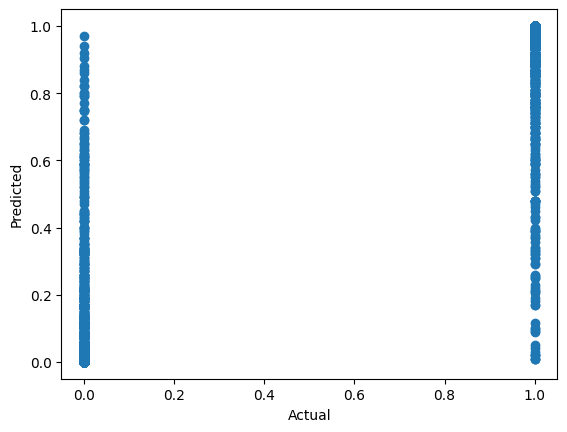

In [103]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

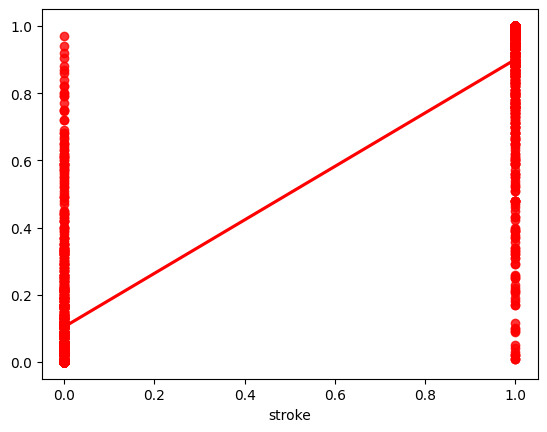

In [104]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [105]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1145,0.0,0.00,0.00
8501,1.0,0.99,0.01
3903,0.0,0.00,0.00
1608,0.0,0.37,-0.37
9139,1.0,0.96,0.04
...,...,...,...
6255,1.0,1.00,0.00
1918,0.0,0.16,-0.16
9530,1.0,0.94,0.06
4184,0.0,0.00,0.00


### Deploy in Flask

In [106]:

import pickle
# Saving model to disk of random forest
pickle.dump(RAND_model, open('model.pkl','wb'))

model=pickle.load(open('model.pkl', 'rb'))

